In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
import numpy as np
import pandas as pd
# This will prompt for authorization.
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
tweets = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/tweets_final.csv')

In [ ]:
tweets['timestamp'] = pd.to_datetime(tweets.timestamp)

In [ ]:
tweets['timestamp'] = tweets['timestamp'].apply(lambda x: x.replace(second=0, microsecond=0, minute=0))

Drop duplicated tweets|

In [ ]:
unique_dates = pd.unique(tweets.timestamp)
df = tweets[tweets.timestamp == unique_dates[0]].drop_duplicates()
for i in range(1,len(unique_dates)):
  df = pd.concat([df, tweets[tweets.timestamp == unique_dates[i]].drop_duplicates()])

In [ ]:
df.to_csv('/content/drive/My Drive/Magisterka/dane_final/tweets_final.csv', index = False)

In [ ]:
tweets = df

In [ ]:
tweets['month'] = tweets.timestamp.dt.month
tweets['day'] = tweets.timestamp.dt.day
tweets['year'] = tweets.timestamp.dt.year
tweets['hour'] = tweets.timestamp.dt.hour

Count number of tweets per hour

In [ ]:
np.mean(list(tweets.groupby(by = ['timestamp']).count().negative))

157.36971138453094

mean nymber of tweets per hour - 251

No handles with labels found to put in legend.


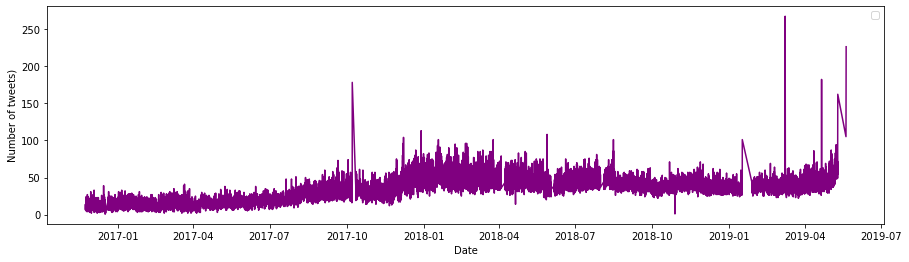

In [ ]:
fig, ax = plt.subplots(nrows=1, ncols=1,figsize=(15, 4), sharex=True)

kolory = {14: 'purple', 24:'red', 48:'green'}

ax.plot(list(x[x<300].index),
        list(list(x[x<300])),
        color=kolory[14])


ax.legend()

# Set title and labels for axes
ax.set(xlabel = 'Date',
       ylabel="Number of tweets)")

sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
#plt.savefig(sciezka+'log_notweets.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
np.median(tweets.groupby(by = ['timestamp']).count().negative)

36.0

In [ ]:
np.max(tweets.groupby(by = ['timestamp']).count().negative)

8274

In [ ]:
np.min(tweets.groupby(by = ['timestamp']).count().negative)

1

In [ ]:
tweets.groupby(by = ['timestamp']).count().negative.value_counts()

38      672
37      662
39      660
40      658
41      634
       ... 
2123      1
4152      1
2041      1
2025      1
4138      1
Name: negative, Length: 1136, dtype: int64

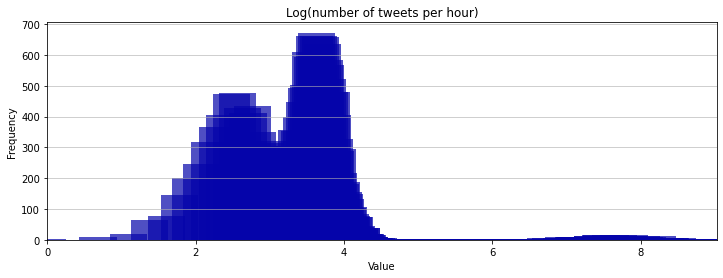

In [ ]:
f, ax = plt.subplots(figsize=(12,4))
hist,bin_edges = np.histogram(np.log(tweets.groupby(by = ['timestamp']).count().negative), bins = 1000)
plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.xticks()
plt.yticks()
plt.ylabel('Frequency')
plt.title('Log(number of tweets per hour)')
sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
plt.savefig(sciezka+'histlog_notweets.png', dpi=300, bbox_inches='tight')
plt.show()

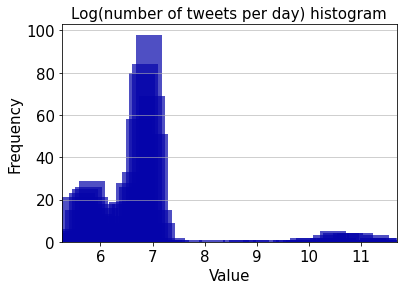

In [ ]:
hist,bin_edges = np.histogram(np.log(tweets.groupby(by = ['month', 'day', 'year']).count().negative), bins = 100)
plt.bar(bin_edges[:-1], hist, width = 0.5, color='#0504aa',alpha=0.7)
plt.xlim(min(bin_edges), max(bin_edges))
plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value',fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.ylabel('Frequency',fontsize=15)
plt.title('Log(number of tweets per day) histogram',fontsize=15)
plt.show()

scoring VADER

In [ ]:
!pip install vaderSentiment

     |████████████████████████████████| 133kB 7.9MB/s 


In [ ]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import pandas as pd
analyser = SentimentIntensityAnalyzer()

def sentiment_analyzer_scores(sentence):
    score = analyser.polarity_scores(sentence)
    return score

In [ ]:
vader = tweets[['timestamp', 'text']]

In [ ]:
%%time
comp = list()
neg = list()
neu = list()
pos = list()

for i in vader.text:
  vader_scores = sentiment_analyzer_scores(i)
  comp.append(vader_scores['compound'])
  neg.append(vader_scores['neg'])
  neu.append(vader_scores['neu'])
  pos.append(vader_scores['pos'])


CPU times: user 7min 14s, sys: 1.81 s, total: 7min 16s
Wall time: 7min 17s


In [ ]:
vader['comp'] = comp
vader['neg'] = neg
vader['neu'] = neu
vader['pos'] = pos

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
vader.to_csv('/content/drive/My Drive/Magisterka/dane_final/vader.csv', index = False)

In [ ]:
vader = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/vader.csv')

In [ ]:
vader['timestamp'] = pd.to_datetime(vader['timestamp'])

New statistics per hour(or day):


*   Mean positive score
*   Mean negative score
*   Number of negative tweets above 0.9
*   Number of positive tweete above 0.9
*   Fraction Number of negative tweets above 0.9/number of all tweets
*   Fraction Number of positive tweets above 0.9/number of all tweets
*  Number of tweets
*   Polarity score

to do: frakcja: liczba pozytywnych/liczba negatywnych

In [ ]:
vader_stats = vader.groupby(by = ['timestamp']).mean().reset_index()[['timestamp', 'comp', 'neg', 'neu', 'pos']]
vader_stats.columns = ['timestamp', 'mean_comp', 'mean_neg', 'mean_neu', 'mean_pos']
vader_positive = vader[vader.comp > 0.5]
vader_positive = vader_positive.groupby(by = ['timestamp']).count().reset_index()[['timestamp', 'pos']]
vader_positive.columns = ['timestamp', 'no_positive']
vader_negative = vader[vader.comp <-0.5 ]
vader_negative = vader_negative.groupby(by = ['timestamp']).count().reset_index()[['timestamp', 'neg']]
vader_negative.columns = ['timestamp', 'no_negative']
vader_counts = vader.groupby(by = ['timestamp']).count().reset_index()[['timestamp', 'pos']]
vader_counts.columns = ['timestamp', 'counter']
vader_stats = vader_stats.merge(vader_positive, how = 'left', right_on = ['timestamp'], left_on = ['timestamp'])
vader_stats = vader_stats.merge(vader_negative, how = 'left', right_on = ['timestamp'], left_on = ['timestamp'])
vader_stats = vader_stats.merge(vader_counts, how = 'left', right_on = ['timestamp'], left_on = ['timestamp'])
vader_stats = vader_stats.fillna(0)
vader_stats['positive_ratio'] = vader_stats['no_positive']/vader_stats['counter']
vader_stats['negative_ratio'] = vader_stats['no_negative']/vader_stats['counter']
vader_stats['negative_positive_ratio'] = vader_stats['no_negative']/(vader_stats['no_positive']+0.1)
vader_stats['polarity'] = np.sqrt(vader_stats['mean_neg']*vader_stats['mean_pos'])


In [ ]:
vader_stats

,timestamp,mean_comp,mean_neg,mean_neu,mean_pos,no_positive,no_negative,counter,positive_ratio,negative_ratio,negative_positive_ratio,polarity
0,2016-11-23 00:00:00+00:00,-0.014743,0.036429,0.930714,0.033000,0.0,0.0,7,0.000000,0.000000,0.000000,0.034672
1,2016-11-23 01:00:00+00:00,-0.010320,0.025500,0.951500,0.023100,0.0,0.0,10,0.000000,0.000000,0.000000,0.024270
2,2016-11-23 02:00:00+00:00,-0.005160,0.013100,0.975000,0.011900,0.0,0.0,10,0.000000,0.000000,0.000000,0.012486
3,2016-11-23 03:00:00+00:00,-0.012900,0.031875,0.939375,0.028875,0.0,0.0,8,0.000000,0.000000,0.000000,0.030338
4,2016-11-23 04:00:00+00:00,0.044100,0.010077,0.962154,0.027769,1.0,0.0,13,0.076923,0.000000,0.000000,0.016728
...,...,...,...,...,...,...,...,...,...,...,...,...
21858,2019-05-22 19:00:00+00:00,0.155695,0.031637,0.881903,0.086462,719.0,170.0,3259,0.220620,0.052163,0.236407,0.052301
21859,2019-05-22 20:00:00+00:00,0.146267,0.031720,0.882948,0.085331,709.0,168.0,3243,0.218625,0.051804,0.236920,0.052026
21860,2019-05-22 21:00:00+00:00,0.127827,0.031567,0.891354,0.077076,542.0,128.0,2819,0.192267,0.045406,0.236119,0.049326
21861,2019-05-22 22:00:00+00:00,0.130211,0.032437,0.884951,0.082615,498.0,134.0,2542,0.195909,0.052714,0.269022,0.051767


In [ ]:
vader_stats['sum_pos_neg'] = vader_stats['no_positive'] + vader_stats['no_negative']

In [ ]:
brak = pd.DataFrame(pd.DataFrame(np.array([pd.to_datetime('2017-10-29 00:00:00+00:00')] + list(vader_stats[vader_stats.timestamp == pd.to_datetime('2017-10-29 01:00:00+00:00')].values[:,1:][0])).reshape([1,12])))
brak.columns = vader_stats.columns
vader_stats = pd.concat([vader_stats, brak]).sort_values(by = 'timestamp')
vader_stats['sum_pos_neg'] = vader_stats['no_positive'] + vader_stats['no_negative']

In [ ]:
vader_stats.to_csv('/content/drive/My Drive/Magisterka/dane_final/vader_stats.csv', index = False)

In [ ]:
max_lag = 12
shape_of_results = vader_stats.shape[0] - max_lag 
i=1
stata = vader_stats.iloc[(vader_stats.shape[0]-i-shape_of_results):vader_stats.shape[0]-i,1:].reset_index().iloc[:,1:]
stata.columns = [name+'_l'+str(i) for name in vader_stats.columns[1:]]
for i in list(range(2,13)):
  st = vader_stats.iloc[(vader_stats.shape[0]-i-shape_of_results):vader_stats.shape[0]-i,1:].reset_index().iloc[:,1:]
  st.columns = ['vader' + name + '_l'+str(i) for name in vader_stats.columns[1:]]
  stata = pd.concat([stata,st], 1)
stata['timestamp'] = vader_stats.iloc[max_lag:,:]['timestamp'].reset_index()['timestamp']
vader_stats_laged = stata[[stata.columns[-1]]+list(stata.columns[0:-1])]

In [ ]:
vader_stats_laged.to_csv('/content/drive/My Drive/Magisterka/dane_final/vader_stats_laged.csv', index = False)

In [ ]:
vad = pd.read_csv('/content/drive/My Drive/Magisterka/dane_final/vader_stats.csv')

In [ ]:
vad['timestamp'] = pd.to_datetime(vad['timestamp'])

In [ ]:
vad = vader_stats

In [ ]:
np.mean(vad.no_negative)

6.8190633004024885

In [ ]:
np.mean(vad.no_positive)

22.911589828027807

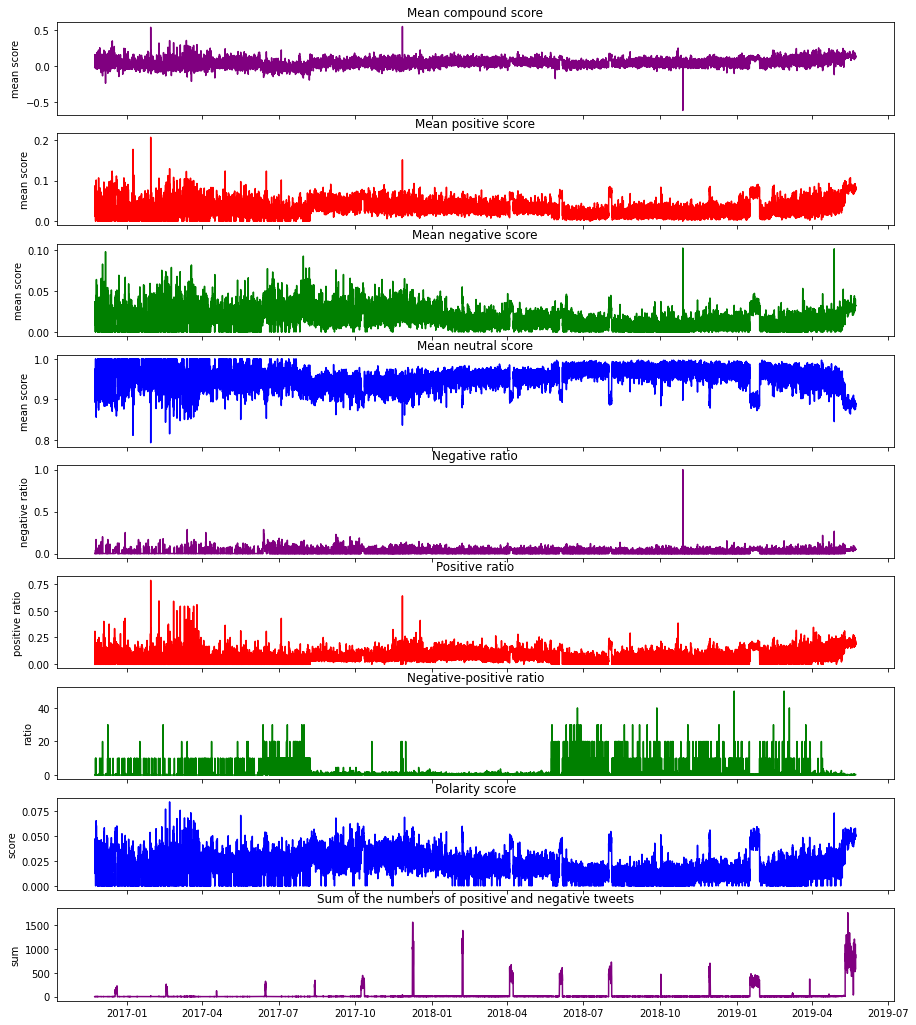

In [ ]:
fig, ax = plt.subplots(nrows=9, ncols=1,figsize=(15, 18), sharex=True)
kolory = {'comp': 'purple', 'neg':'red', 'neu':'green', 'pos':'blue'}


ax[0].plot(list(vad['timestamp']),
        list(vad['mean_comp']),
        color='purple')

ax[0].set(
       ylabel="mean score",
       title="Mean compound score")

ax[1].plot(list(vad['timestamp']),
        list(vad['mean_pos']),
        color='red')

ax[1].set(
       ylabel="mean score",
       title="Mean positive score")

ax[2].plot(list(vad['timestamp']),
        list(vad['mean_neg']),
        color='green')

ax[2].set(
       ylabel="mean score",
       title="Mean negative score")

ax[3].plot(list(vad['timestamp']),
        list(vad['mean_neu']),
        color='blue')

ax[3].set(
       ylabel="mean score",
       title="Mean neutral score")

kolory = {'positive': 'purple', 'negative':'red', 'neu':'green', 'pos':'blue'}

ax[4].plot(list(vad['timestamp']),
        list(vad['negative_ratio']),
        color='purple')

ax[4].set(
       ylabel="negative ratio",
       title="Negative ratio")

ax[5].plot(list(vad['timestamp']),
        list(vad['positive_ratio']),
        color='red')

ax[5].set(
       ylabel="positive ratio",
       title="Positive ratio")



ax[6].plot(list(vad['timestamp']),
        list(vad['negative_positive_ratio']),
        color='green')


ax[6].set(
       ylabel="ratio",
       title="Negative-positive ratio")

ax[7].plot(list(vad['timestamp']),
        list(vad['polarity']),
        color='blue')


ax[7].set(
       ylabel="score",
       title="Polarity score")


ax[8].plot(list(vad['timestamp']),
        list(vad['sum_pos_neg']),
        color='purple')


ax[8].set(
       ylabel="sum",
       title="Sum of the numbers of positive and negative tweets")



sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
plt.savefig(sciezka+'feature_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
vad = vad[vad.counter<500]

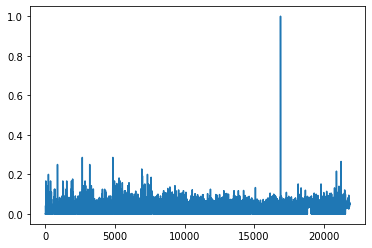

In [ ]:
plt.plot(vad.negative_ratio)

In [ ]:
fig, ax = plt.subplots(nrows=9, ncols=1,figsize=(15, 18), sharex=True)
kolory = {'comp': 'purple', 'neg':'red', 'neu':'green', 'pos':'blue'}


ax[0].plot(list(vad['timestamp']),
        list(vad['mean_comp']),
        color='purple')

ax[0].set(
       ylabel="mean score",
       title="Mean compound score")

ax[1].plot(list(vad['timestamp']),
        list(vad['mean_pos']),
        color='red')

ax[1].set(
       ylabel="mean score",
       title="Mean positive score")

ax[2].plot(list(vad['timestamp']),
        list(vad['mean_neg']),
        color='green')

ax[2].set(
       ylabel="mean score",
       title="Mean negative score")

ax[3].plot(list(vad['timestamp']),
        list(vad['mean_neu']),
        color='blue')

ax[3].set(
       ylabel="mean score",
       title="Mean neutral score")

kolory = {'positive': 'purple', 'negative':'red', 'neu':'green', 'pos':'blue'}

ax[4].plot(list(vad['timestamp']),
        list(vad['negative_ratio']),
        color='purple')

ax[4].set(
       ylabel="negative ratio",
       title="Negative ratio")

ax[5].plot(list(vad['timestamp']),
        list(vad['positive_ratio']),
        color='red')

ax[5].set(
       ylabel="positive ratio",
       title="Positive ratio")



ax[6].plot(list(vad['timestamp']),
        list(vad['negative_positive_ratio']),
        color='green')


ax[6].set(
       ylabel="ratio",
       title="Negative-positive ratio")

ax[7].plot(list(vad['timestamp']),
        list(vad['polarity']),
        color='blue')


ax[7].set(
       ylabel="score",
       title="Polarity score")


ax[8].plot(list(vad['timestamp']),
        list(vad['no_positive']),
        color='purple')


ax[8].set(
       ylabel="sum",
       title="Sum of the numbers of positive and negative tweets")

sciezka = '/content/drive/My Drive/Magisterka/wykresy/'
#plt.savefig(sciezka+'feature_sentiment.png', dpi=300, bbox_inches='tight')
plt.show()